In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Boston.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
df.corr()["MEDV"]

CRIM      -0.388305
 ZN        0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [14]:
#Splitting data into dependent and independent variable
# x = df.iloc[:, :12]
# y = df.iloc[:, -1]


Pre visualization of data


<Axes: xlabel='CRIM', ylabel='MEDV'>

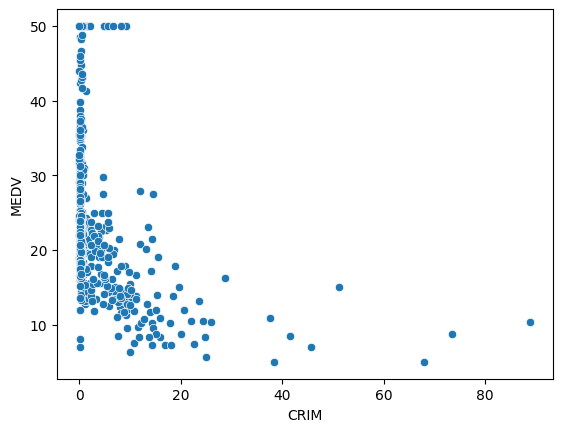

In [23]:
#CRIM = Crime rate
sns.scatterplot(x = df.CRIM, y = df.MEDV)

<Axes: xlabel='ZN', ylabel='MEDV'>

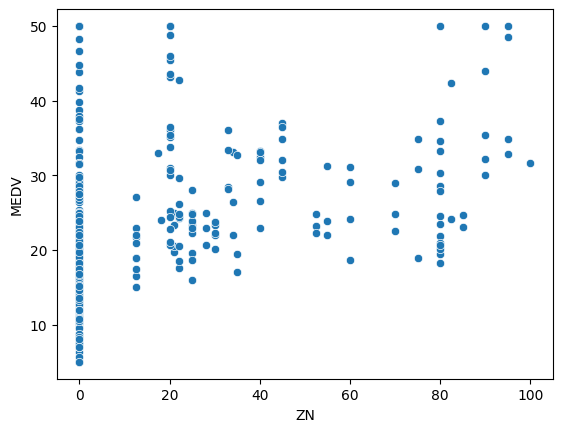

In [35]:
#zn = proportion of residential land zoned for lots over 25,000 sq.ft.
sns.scatterplot(x = df.ZN, y = df.MEDV)


<Axes: xlabel='INDUS', ylabel='MEDV'>

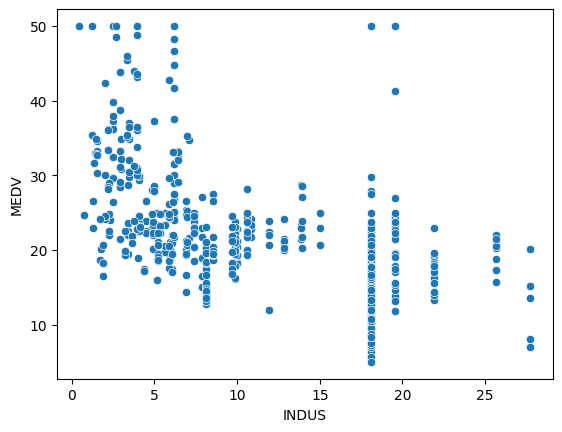

In [36]:
# zn = proportion of non-retail business acres per town.
sns.scatterplot(x='INDUS', y='MEDV', data=df)

<Axes: xlabel='CHAS', ylabel='MEDV'>

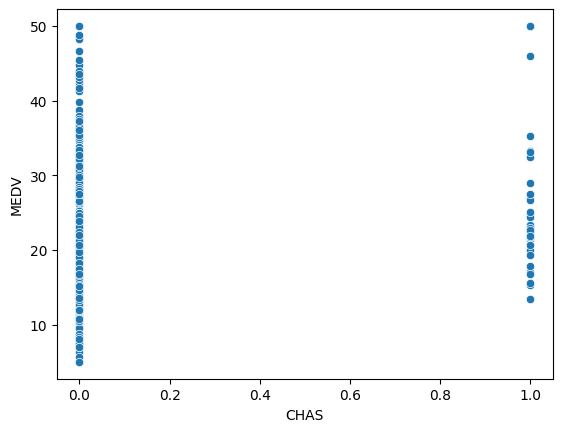

In [37]:
sns.scatterplot(x='CHAS', y='MEDV', data=df)

<Axes: xlabel='NOX', ylabel='MEDV'>

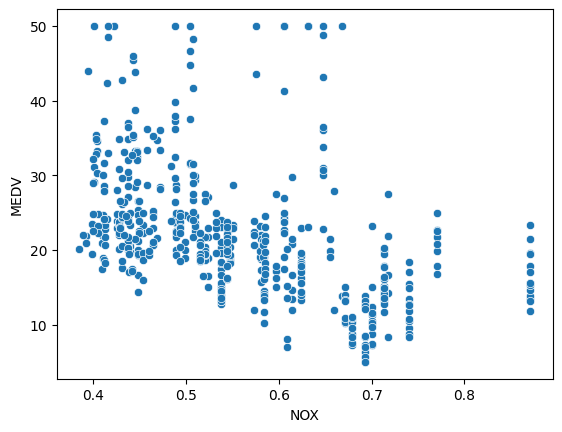

In [46]:
# NOX = nitrogen oxides concentration (parts per 10 million)
sns.scatterplot(x='NOX', y='MEDV',data=df)

<Axes: xlabel='RM', ylabel='MEDV'>

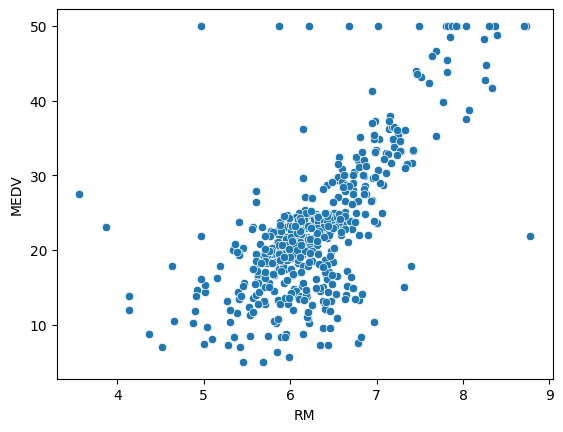

In [47]:
#rm = average number of rooms per dwelling
sns.scatterplot(x='RM', y='MEDV', data=df)

<Axes: xlabel='NOX', ylabel='RM'>

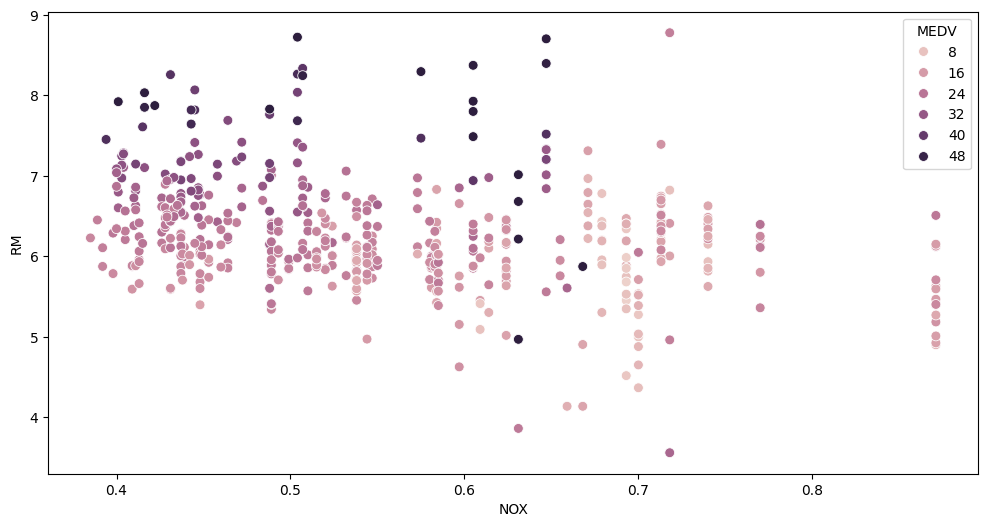

In [51]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='NOX', y='RM', hue='MEDV', s=50, data=df)


<Axes: >

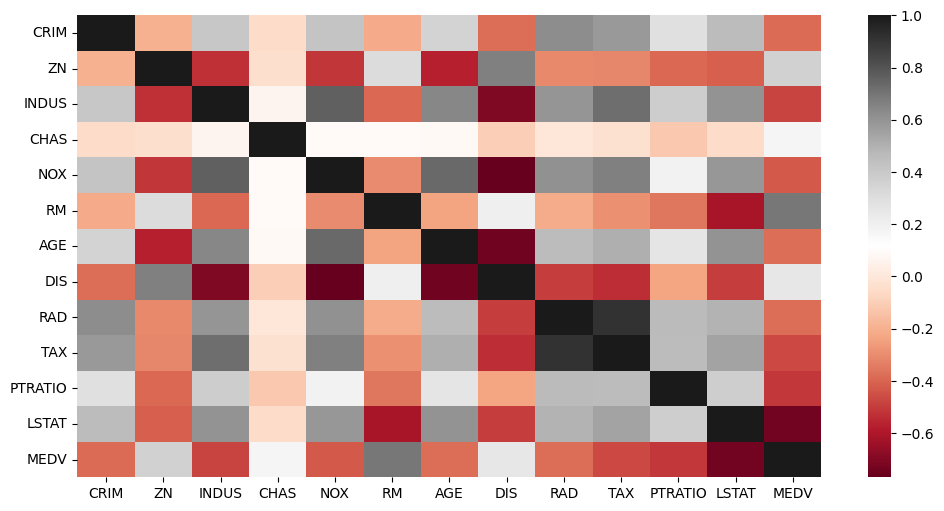

In [54]:
#Drawing heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap= 'RdGy')

In [3]:
#Splitting data into dependent and independent variable
x = df.iloc[:, :12]
y = df.iloc[:, -1]

In [4]:
#Splitting into train and test data using train_test_split function 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
predictions = model.predict(X_test)
print(predictions)
print(y_test)
intercept = model.intercept_
slope = model.coef_[0]


[28.57094774 36.81549468 14.77342714 25.40879164 17.83709907 23.16449335
 17.15522701 13.49000152 22.13052286 20.28195952 24.78234243 18.30984099
 -4.85443361 21.6241052  19.24399263 25.34909243 20.11888967  4.57693599
 40.32947719 16.4011725  27.42039613 30.09145823 11.07523442 23.96296133
 17.90714413 15.47494417 22.94468805 17.87544105 22.49189601 19.03202569
 22.06247478 25.11072892 24.04433573 17.86692173 16.25957928 18.44827257
 30.96796371 20.17403234 24.19001512 24.95168383 13.5253433  31.7582742
 42.47240344 17.52748697 27.07696462 16.16466286 14.07453935 26.10426805
 19.26722596 30.11274101 21.06774008 34.11059788 15.33667916 25.964418
 39.13846857 22.10873004 17.84275474 33.09663034 24.80711674 12.76610932
 22.46769932 30.75208688 31.64525856 17.49348348 21.3470605  16.64731915
 19.24441479 26.15659269 31.14392822 15.3856907  20.28926532 26.68912681
 11.47323083 17.22024636 23.80104279  3.72145378 21.33150314 41.21941893
 16.89639244  9.32000961 21.16374106 12.69277706 21.68

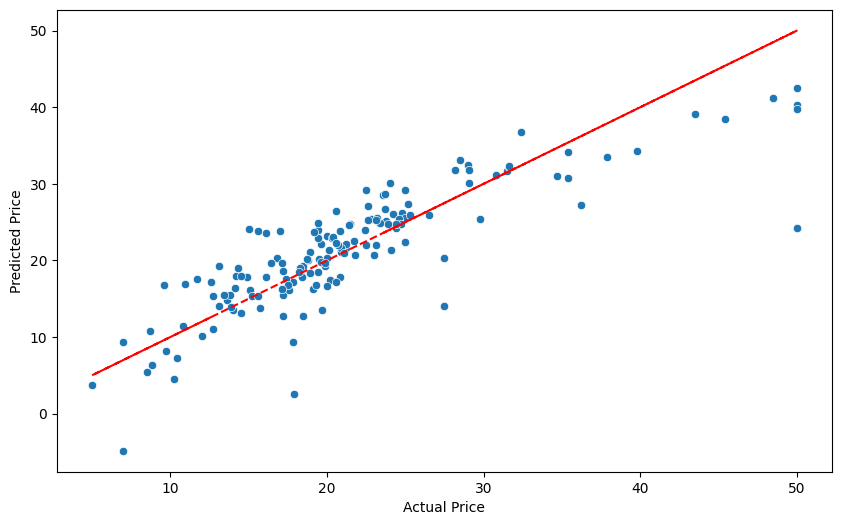

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test, y = predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.plot(y_test, y_test, color='red', linestyle='--')


In [10]:
mse = mean_squared_error(y_test, predictions)
print(mse)
r2 = r2_score(y_test, predictions)
print(r2)

21.115450613869438
0.7166209449097798
